In [177]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
from sklearn.impute import SimpleImputer 

In [178]:
df = pd.read_csv('winequality.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [179]:
df.shape

(6497, 13)

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [181]:
df.isnull().sum().sort_values(ascending=False)

fixed acidity           10
pH                       9
volatile acidity         8
sulphates                4
citric acid              3
residual sugar           2
chlorides                2
type                     0
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
alcohol                  0
quality                  0
dtype: int64

Data Cleaning

In [182]:
num_col=df.select_dtypes(include=['int64','float64']).columns 
num_col 

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [183]:
df[num_col].isnull().sum() 

fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [184]:
impute_median=SimpleImputer(strategy='median') 

In [185]:
impute_median.fit(df[num_col])

SimpleImputer(strategy='median')

In [186]:
impute_median.statistics_ 

array([7.0000e+00, 2.9000e-01, 3.1000e-01, 3.0000e+00, 4.7000e-02,
       2.9000e+01, 1.1800e+02, 9.9489e-01, 3.2100e+00, 5.1000e-01,
       1.0300e+01, 6.0000e+00])

In [187]:
impute_median.transform(df[num_col]) 

array([[ 7.   ,  0.27 ,  0.36 , ...,  0.45 ,  8.8  ,  6.   ],
       [ 6.3  ,  0.3  ,  0.34 , ...,  0.49 ,  9.5  ,  6.   ],
       [ 8.1  ,  0.28 ,  0.4  , ...,  0.44 , 10.1  ,  6.   ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  0.75 , 11.   ,  6.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  0.71 , 10.2  ,  5.   ],
       [ 6.   ,  0.31 ,  0.47 , ...,  0.66 , 11.   ,  6.   ]])

In [188]:
df[num_col]=impute_median.transform(df[num_col]) 

In [189]:
df[num_col].isnull().sum() 

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [190]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.216246,0.339630,0.318718,5.443574,0.056039,30.525319,115.744574,0.994697,3.218384,0.531202,10.491801,5.818378
std,1.295779,0.164557,0.145231,4.757585,0.035031,17.749400,56.521855,0.002999,0.160637,0.148769,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [191]:
columns_to_check = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
                    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 
                    'density', 'pH', 'sulphates', 'alcohol', 'quality']

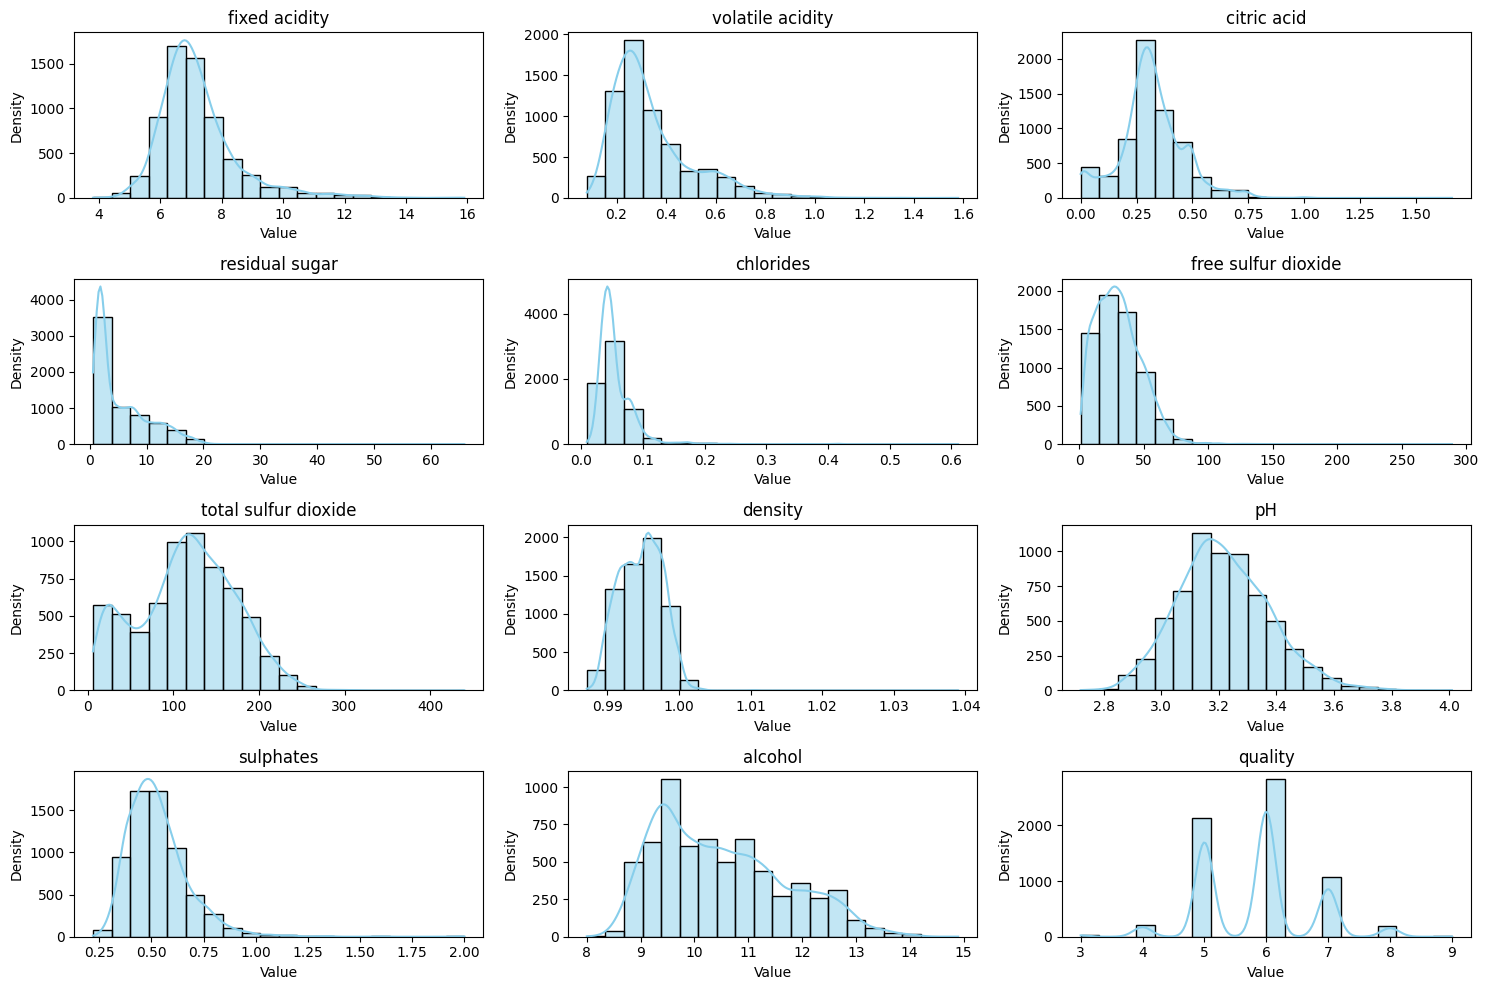

In [192]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_to_check):
    plt.subplot(4, 3, i + 1)
    sns.histplot(df[col], kde=True, color='skyblue', bins=20)
    plt.title(col)
    plt.xlabel('Value')
    plt.ylabel('Density')
plt.tight_layout()
plt.show()

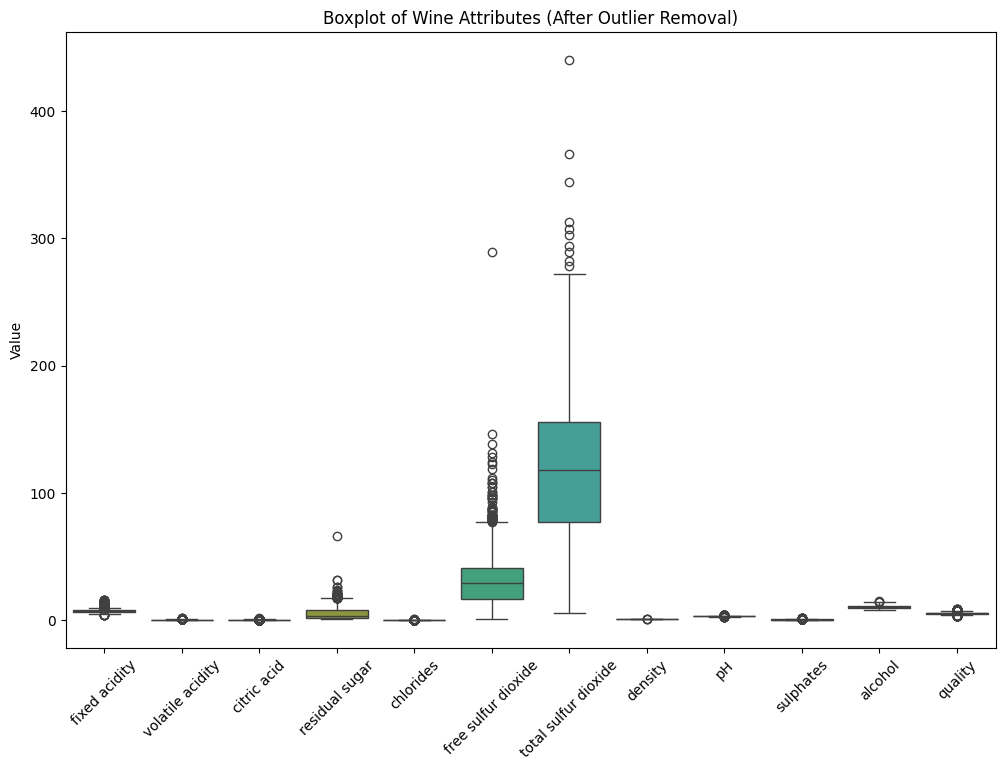

In [193]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[columns_to_check])
plt.title('Boxplot of Wine Attributes (After Outlier Removal)')
plt.xticks(rotation=45)
plt.ylabel('Value')
plt.show()

In [194]:
def remove_outliers(data, columns_to_check, threshold=3):

    cleaned_data = data.copy()  # Avoid modifying original DataFrame

    for col in columns_to_check:
        z_scores = np.abs((cleaned_data[col] - cleaned_data[col].mean()) / cleaned_data[col].std())
        cleaned_data = cleaned_data[(z_scores < threshold)]

    return cleaned_data

In [195]:
cleaned_data = remove_outliers(df, columns_to_check)

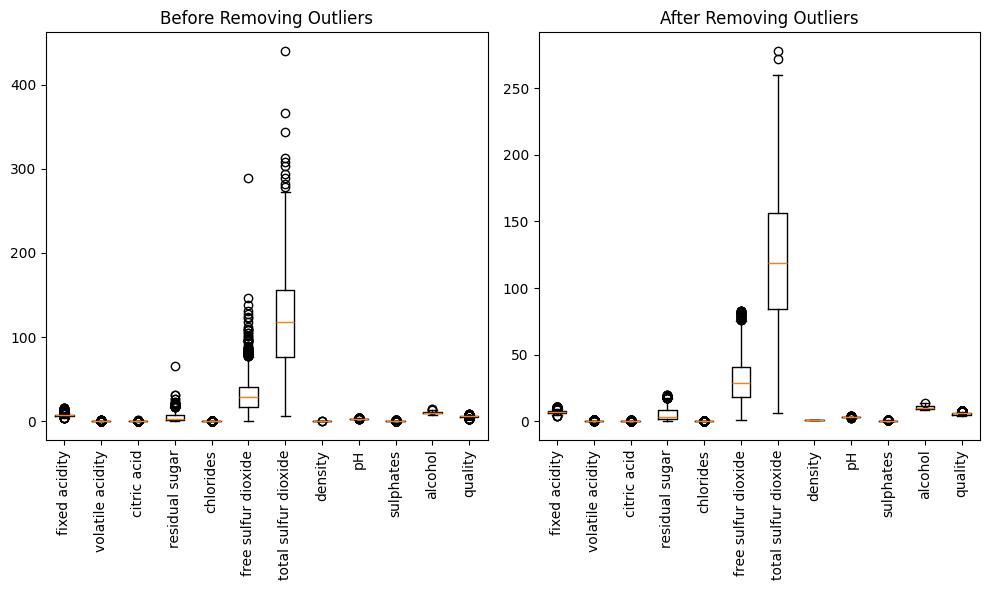

In [196]:
plt.figure(figsize=(10, 6))

# Boxplot before removing outliers
plt.subplot(1, 2, 1)
plt.boxplot(df[columns_to_check].values, labels=columns_to_check)
plt.title('Before Removing Outliers')
plt.xticks(rotation=90)

# Boxplot after removing outliers
plt.subplot(1, 2, 2)
plt.boxplot(cleaned_data[columns_to_check].values, labels=columns_to_check)
plt.title('After Removing Outliers')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [199]:
x = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']]
y = df['type']

In [201]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test =train_test_split(x,y,test_size=0.25, random_state=0) 

In [203]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test) 

In [205]:
from sklearn.linear_model import LogisticRegression 
classifer = LogisticRegression(random_state=0) 
classifer.fit(X_train,y_train) 

LogisticRegression(random_state=0)

In [207]:
y_pred= classifer.predict(X_test) 

In [209]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test,y_pred) 

In [210]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_test,y_pred) 

0.9944615384615385